In [2]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
# Check Length of SMS
import pandas
df_sms = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})

In [5]:
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Checking the maximum length of SMS
print (len(df_sms))

5572


In [7]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


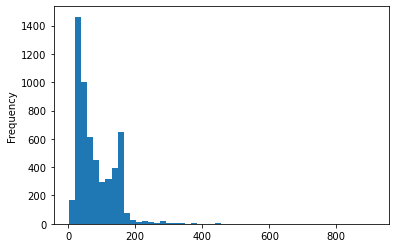

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ae436ed0>,
      dtype=object)

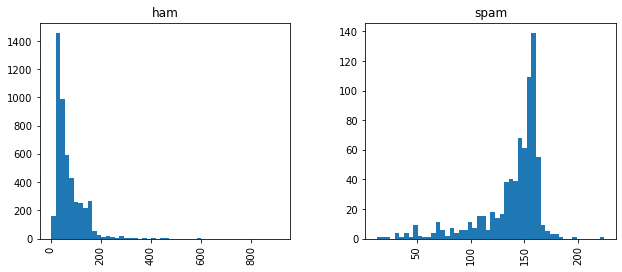

In [12]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [13]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
## Implementation of Bag of Words Approach
##Step 1: Convert all strings to their lower case form.

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [15]:
#Step 2: Removing all punctuations
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [16]:
#Step 3: Tokenization
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [17]:
#Step 4: Count frequencies
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [18]:
#Implementing Bag of Words in scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [19]:
#Data preprocessing with CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [20]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [21]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [26]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [27]:
#Implementation of Naive Bayes Machine Learning Algorithm
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [28]:
predictions = naive_bayes.predict(testing_data)

In [30]:
#Evaluating our model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
